In [178]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from control import *

<function matplotlib.pyplot.show>

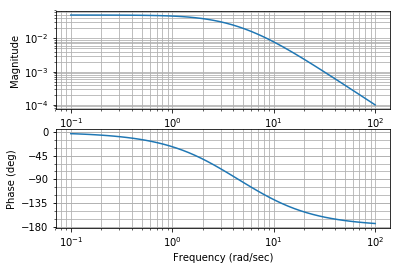

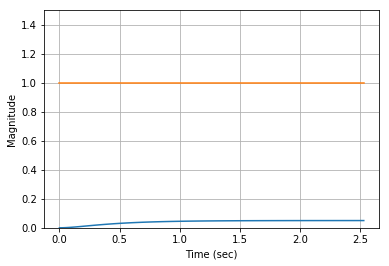

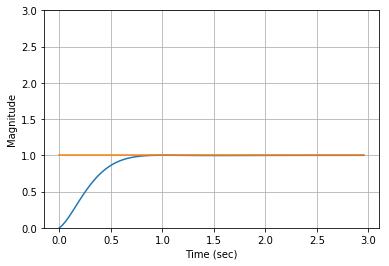

In [194]:
# Plant
num = [1]
den = [1, 10, 20]
G = tf(num, den)
H = [1]
w, mag, phase = bode(G)

# Plant Step Response
t, s = step_response(G)
target = np.linspace(1, 1, num=len(t))
plt.figure()
plt.plot(t,s,t,target)
plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

#PID Controller
Kp = 30
Ki = 70
Kd = 1

pid_num = [Kd, Kp, Ki]
pid_den = [1, 0]
C = tf(pid_num,pid_den)

# System
T = feedback(C*G,1)

# PID compensated Step Response
t, s = step_response(T)
target = np.linspace(1, 1, num=len(t))
plt.figure()
plt.plot(t,s,t,target)
plt.ylim([0,3])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [182]:
L = len(t)

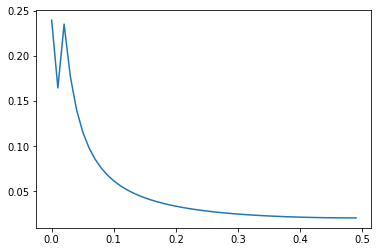

In [185]:
# FOURIER!
sSp = np.fft.fft(s)
targetSp = np.fft.fft(target)
freq = np.fft.fftfreq(t.shape[-1])

P2 = abs(sSp/L)
P1 = P2[1:int(L/2+1)]
P1[2:] = 2*P1[2:]

#plt.plot(freq, sSp.real, freq, sSp.imag)
#plt.plot(freq, P2)
plt.plot(freq[:int(L/2)],P1)
plt.show()

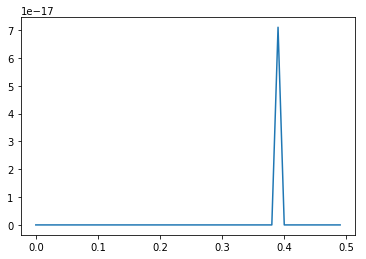

In [192]:
Q2 = abs(targetSp/L)
Q1 = Q2[1:int(L/2+1)]
Q1[2:] = 2*Q1[2:]

plt.plot(freq[:int(L/2)],Q1)
plt.show()

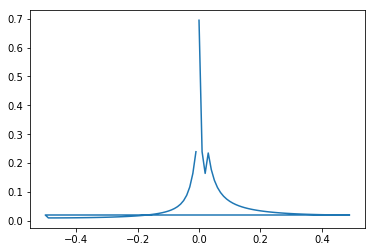

In [193]:
plt.plot(freq,P2-Q2)
plt.show()

In [ ]:
def evaluatePID(kp, ki, kd, Ts, setPoint):
    error0 = 0

    E = [0]

    for k in np.arange(10):
        pidReal = kp
        pidImag = (w*kd - ki/w)

        #pid = complex(pidReal, pidImag)
        
        d = {'antihorapos': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}
        r = pd.DataFrame(data=d)
        #print(r)
        y = model.predict(pd.DataFrame(data=d))
        y1 = y
        y2 = y1
        
        error0 = setPoint - y
        E.append(y)
        
    return E

In [ ]:
P = evaluatePID(kp, ki, kd, 1)

In [213]:
U = np.fft.fft(np.linspace(1,1,100))
U

array([1.00000000e+02+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 3.55271368e-15+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+